# EDA

Let's first explore the data

In [2]:
# read the file https://www.kaggle.com/datasets/anderas/car-consume 
import pandas as pd
df = pd.read_csv('data/measurements.csv')

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

![logo](https://raw.githubusercontent.com/ralphmartynward/ironhack_07_technical_challenge_DA/master/images/overview.png)
![logo](https://raw.githubusercontent.com/ralphmartynward/ironhack_07_technical_challenge_DA/master/images/alerts.png)
![logo](https://raw.githubusercontent.com/ralphmartynward/ironhack_07_technical_challenge_DA/master/images/heatmap.png)
![logo](https://raw.githubusercontent.com/ralphmartynward/ironhack_07_technical_challenge_DA/master/images/describe.png)
![logo](https://raw.githubusercontent.com/ralphmartynward/ironhack_07_technical_challenge_DA/master/images/missing_values.png)

## Cleaning

Thanks to this nifty report we can see that we need to deal with the nans for the columns specials, refill_liters and refill_gas. temp_inside has a few nans too, we can fill that will KNN

### specials

In [4]:
df['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [5]:
# As we seem to be dealing with weather, we'll handle the NaNs with "other" 
df['specials'].fillna('other', inplace=True)

### refill

In [8]:
# we seem to have this column refill_liters as a string, so we'll convert it to a float
def clean_columns(df, df_columns):
    '''function to convert numbers that are object-type to float-type'''
    
    df_copy = df.copy()
    
    for col in df_columns:
        df_copy[col] = [float(str(row).replace(',','.')) for row in df_copy[col]]
    
    return df_copy

In [9]:
# use function to convert refill liters 
df = clean_columns(df, ['refill liters'])
# and now column distance &  consume
df = clean_columns(df, ['distance'])
df = clean_columns(df, ['consume'])
df = clean_columns(df, ['temp_inside'])

In [10]:
df['refill liters'].unique()

array([45. ,  nan, 37.6, 37.7, 38. , 38.3, 10. , 39. , 41. , 37. , 37.2])

the lines match with the lines of refill_gas. This makes sense because they would have refilled the tank at the same time 
Let's fill the NaNs with 0 then 

In [12]:
df['refill liters'].fillna(0, inplace = True)
df['refill gas'].fillna('no', inplace = True)

In [13]:
df['refill gas'].unique()

array(['E10', 'no', 'SP98'], dtype=object)

In [81]:
df['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

We will have some sllight class imbalance here

In [43]:
# save the cleaned df 
df.to_csv('data/measurements_cleaned.csv', index=False)

In [75]:
# load the cleaned df
pd.set_option('display.max_columns', None)
df = pd.read_csv('data/measurements_cleaned.csv')

In [74]:
df

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_AC Sun,specials_AC rain,specials_AC snow,specials_AC sun,specials_ac,specials_ac rain,specials_half rain half sun,specials_other,specials_rain,specials_snow,specials_sun,specials_sun ac,gas_type_SP98,refill gas_SP98,refill gas_no,km_absolute
0,28.0,5.0,26,21.5,12,0,0,0,45.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28.0
1,12.0,4.2,30,21.5,13,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,40.0
2,11.2,5.5,38,21.5,15,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,51.2
3,12.9,3.9,36,21.5,14,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,64.1
4,18.5,4.5,46,21.5,15,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,82.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,7563.1
384,16.1,4.3,38,25.0,31,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,7579.2
385,16.0,3.8,45,25.0,19,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,7595.2
386,15.4,4.6,42,25.0,31,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,7610.6


## Exploring

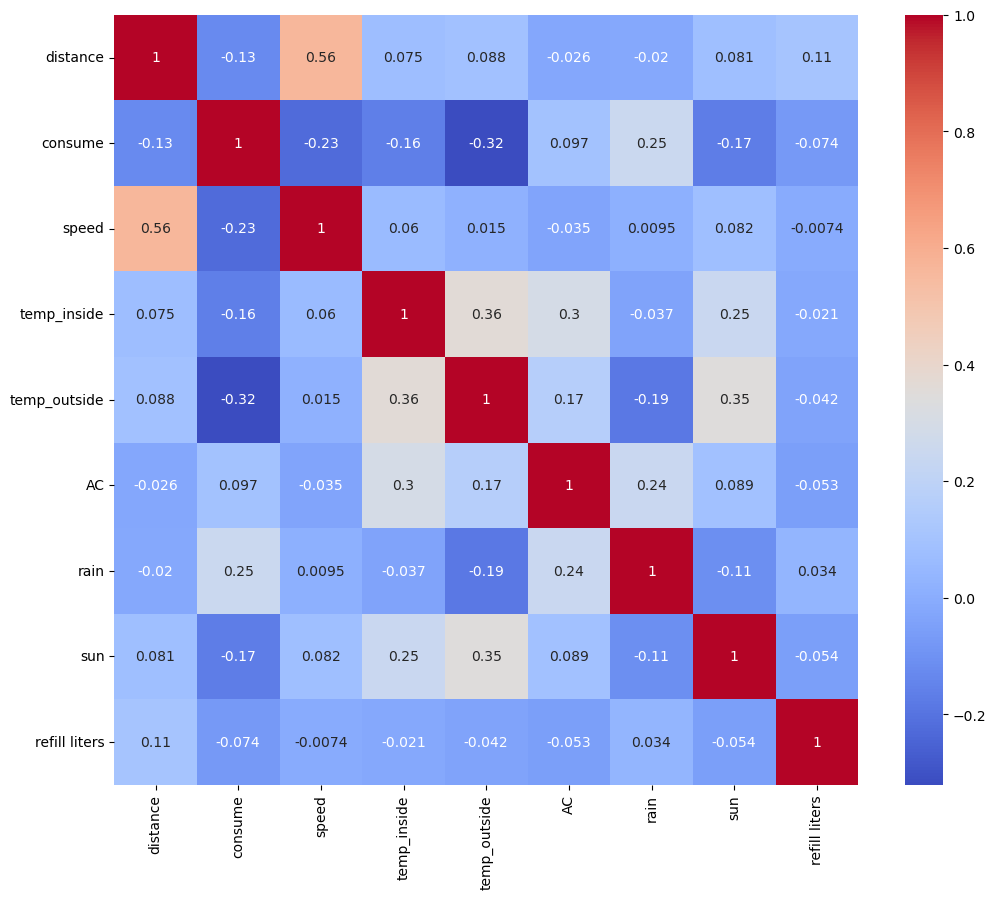

In [58]:
# let's recheck a heatmap now that we've converted to floats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


There is a correlation between distance, consume and speed

Not much happening with the x-features 

outside temperature has some impact too

# Feature Engineering

Let's encode the categorical variables

In [66]:
import numpy as np
numericals = df.select_dtypes(np.number)
categoricals = df.select_dtypes(object)
categoricals = pd.get_dummies(categoricals, drop_first=True)
df = pd.concat([numericals, categoricals], axis=1)

In [47]:
df

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,specials_AC Sun,specials_AC rain,specials_AC snow,specials_AC sun,specials_ac,specials_ac rain,specials_half rain half sun,specials_other,specials_rain,specials_snow,specials_sun,specials_sun ac,gas_type_SP98,refill gas_SP98,refill gas_no
0,28.0,5.0,26,21.5,12,0,0,0,45.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,11.2,5.5,38,21.5,15,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,12.9,3.9,36,21.5,14,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,18.5,4.5,46,21.5,15,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
384,16.1,4.3,38,25.0,31,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
385,16.0,3.8,45,25.0,19,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
386,15.4,4.6,42,25.0,31,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


Now let's apply data transformation with MinMax scaler

In [67]:
# MinMax Scaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

Next let's apply the KNN that we mentioned earlier

In [68]:
# knn for the column temp_inside 
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_scaled)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Visualisations

Let's explore with lmplots the correlations that we saw from the heatmap before

In [76]:
df['km_absolute'] = df['distance'].cumsum()

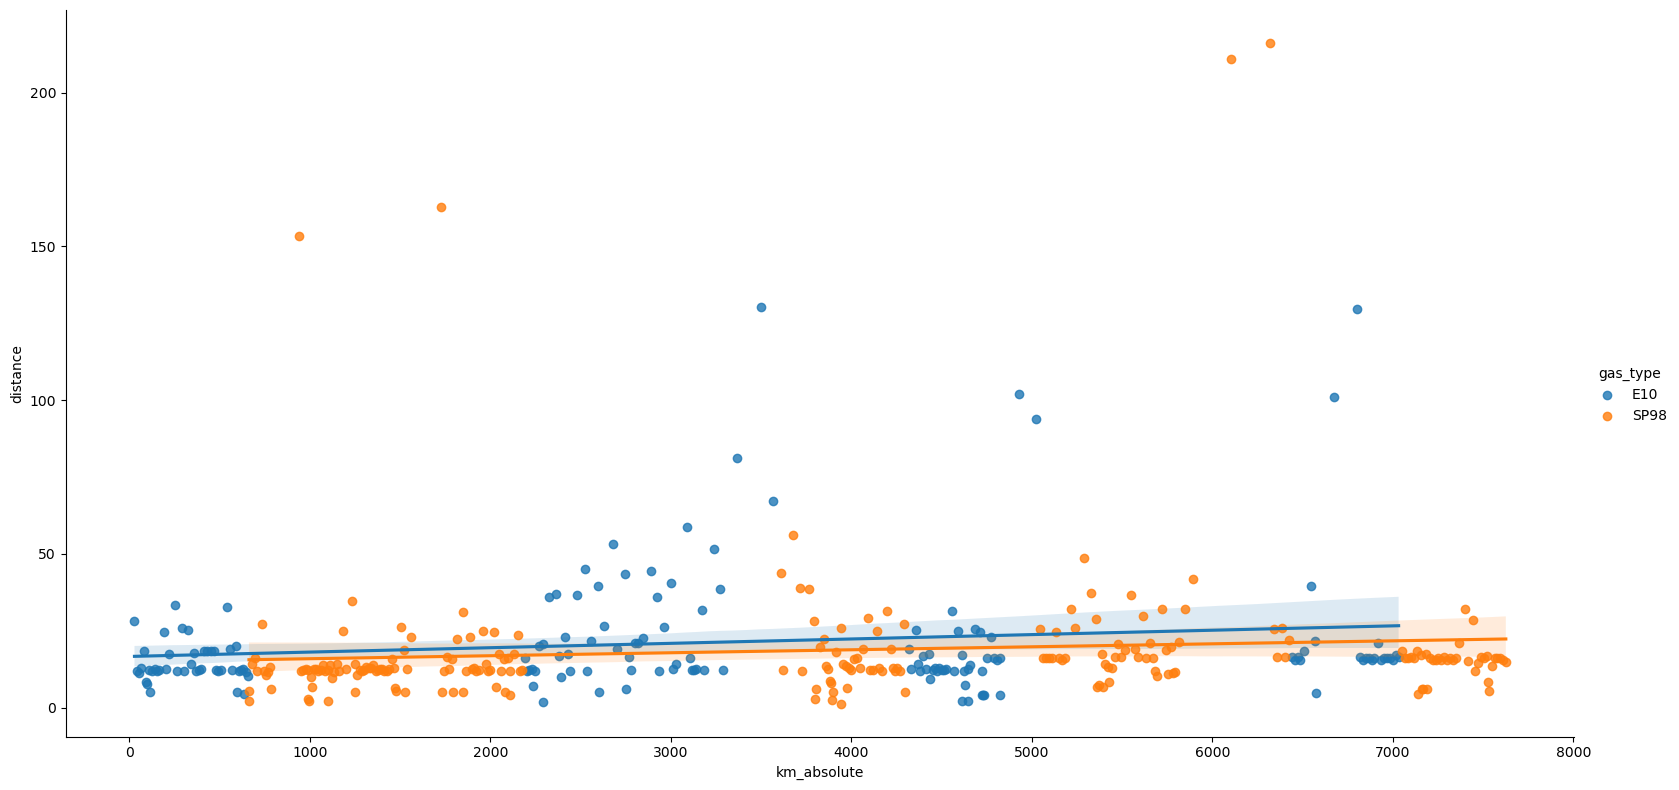

In [77]:
# sns lmplot of km_absolute vs distance 
sns.lmplot(x='km_absolute', y='distance', data=df, hue='gas_type', height=8, aspect=2)
plt.show()

In [ ]:
df['consume_liter'] = df['consume']/100*df['distance']

Text(32.87673611111112, 0.5, 'consume [l/100km]')

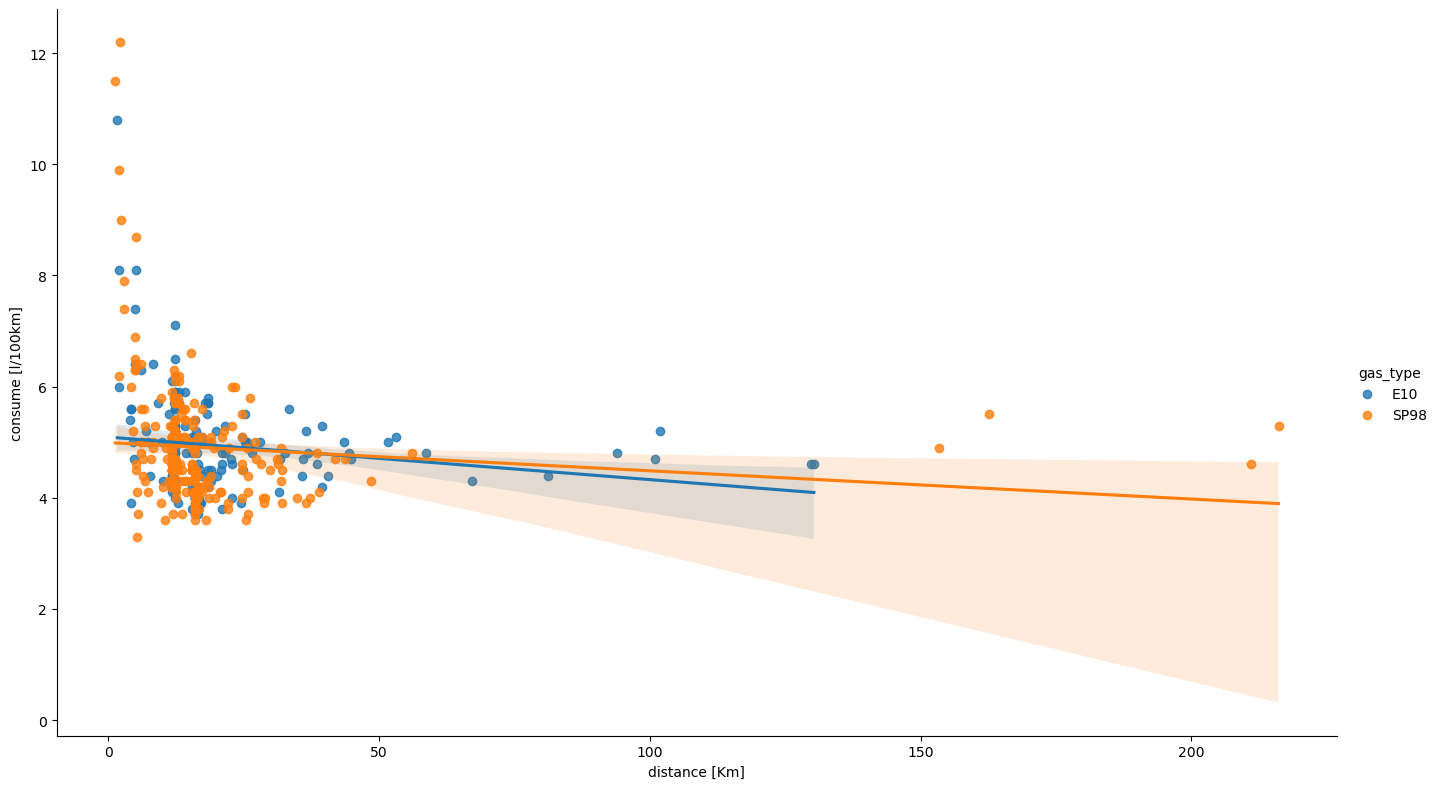

In [78]:
sns.lmplot(data = df, x = 'distance', y = 'consume', hue = 'gas_type', height=8,aspect=1.7)
plt.xlabel('distance [Km]')
plt.ylabel('consume [l/100km]')

Text(33.19802517361111, 0.5, 'temp_outside [°C]')

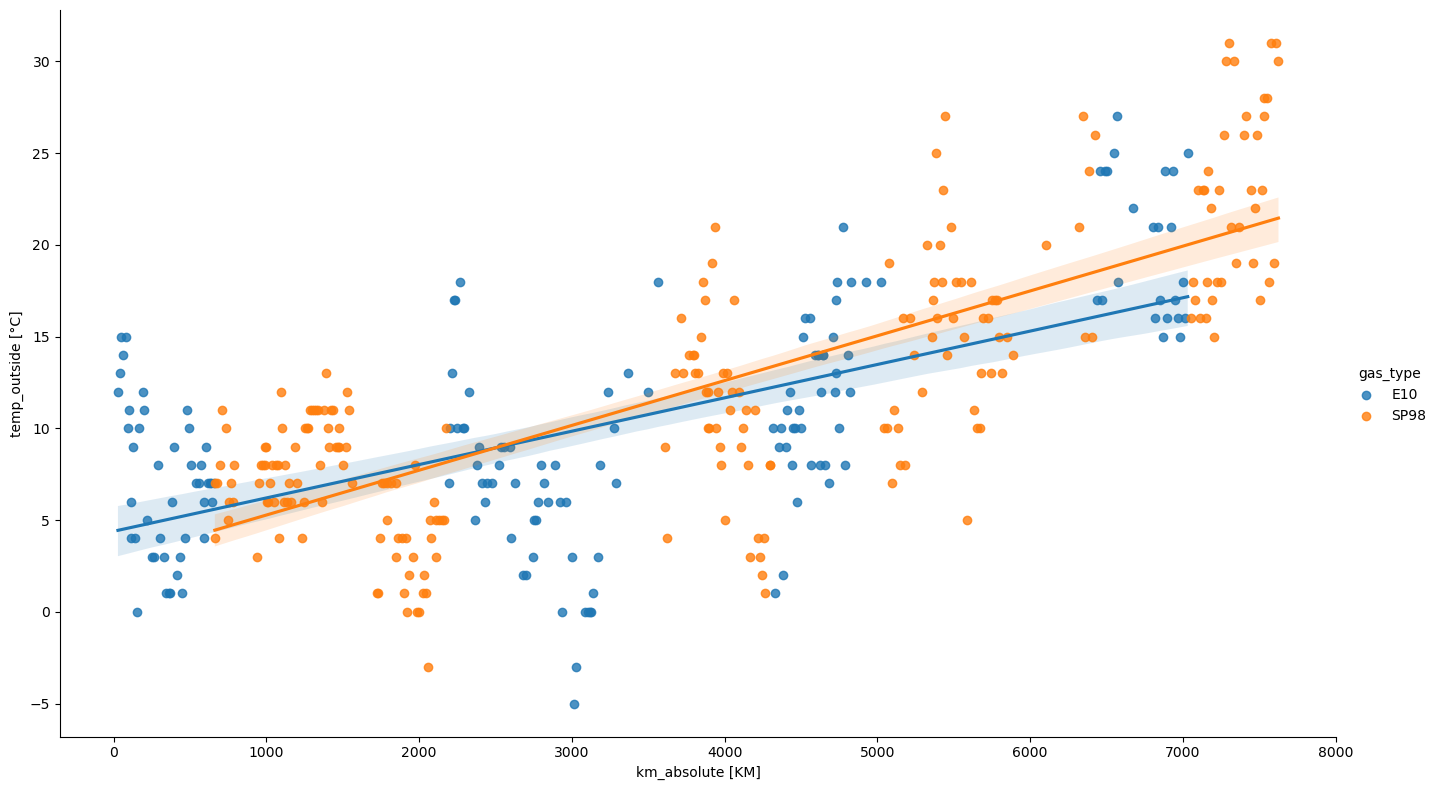

In [79]:
sns.lmplot(data = df, x = 'km_absolute', y =  'temp_outside',hue='gas_type', height=8, aspect=1.7)
plt.xlabel('km_absolute [KM]')
plt.ylabel('temp_outside [°C]')

# Predictions

## Hypothesis

We could try to check out a hypothesis about the weather conditions and the impact of fuel consumption

-> Does driving in the rain or with the AC on increase fuel consumption?

In [83]:
import statsmodels.api as sm

# Define the features and target
X = df_imputed[['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain']]
y = df_imputed['consume']

# Add a constant to the features (this is necessary for statsmodels)
X = sm.add_constant(X)

# Fit an OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     16.42
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           7.62e-17
Time:                        12:39:25   Log-Likelihood:                 330.09
No. Observations:                 388   AIC:                            -646.2
Df Residuals:                     381   BIC:                            -618.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3267      0.022     15.072   

Looking at the p-values for the AC and rain factors, both are less than 0.05, which indicates that these factors have a statistically significant association with fuel consumption at the 5% significance level. speed and temp_outside also appear to be statistically significant predictors of fuel consumption, with p-values less than 0.05.

The analysis provided evidence to support the hypothesis. Both using the air conditioning (AC) and driving in the rain were found to be significantly associated with increased fuel consumption.

## Model

Thanks to this statistical significance we can check further the driving conditions: Is there a combination of speed, temperature (inside and outside), AC, and rain that minimizes fuel consumption? Let's check with a Random Forest Regressor

In [89]:
rf = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importances)


speed           0.547777
temp_outside    0.215730
temp_inside     0.140804
rain            0.057968
AC              0.037722
dtype: float64


We could drop AC to reduce the number of features

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

features = ['speed', 'temp_inside', 'temp_outside', 'rain']
X = df_imputed[features]
y = df_imputed['consume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)

rf.fit(X_train, y_train)

print("Training score: ", rf.score(X_train, y_train))
print("Testing score: ", rf.score(X_test, y_test))


Training score:  0.8566880409486591
Testing score:  -0.08587077922301001


Let's check with GridSearch if we can tune the hyperparameters

In [91]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters: ", best_params)

rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

print("Training score: ", rf_best.score(X_train, y_train))
print("Testing score: ", rf_best.score(X_test, y_test))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Training score:  0.5752808052620064
Testing score:  0.2023599046646305


The model's performance has significantly improved after hyperparameter tuning and overfitting has been reduced. 

# Conclusion